# **SENTIMENTAL ANALYSIS**

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [110]:

data = pd.read_csv('sentiment_reviews.csv')
df = pd.DataFrame(data)


In [111]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Optional: Download stopwords and tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                 # Convert to lowercase
    tokens = word_tokenize(text)        # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [112]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)
y = df['sentiment']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Logistic Regression

In [114]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)
print("Logistic Regression Accuracy:",accuracy_logistic )
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       0.77      0.93      0.84        60

    accuracy                           0.79        98
   macro avg       0.80      0.74      0.75        98
weighted avg       0.80      0.79      0.77        98



Naive Bayes

In [115]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:",accuracy_naive_bayes )
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8061224489795918
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.85      0.83      0.84        60

    accuracy                           0.81        98
   macro avg       0.80      0.80      0.80        98
weighted avg       0.81      0.81      0.81        98



In [116]:
test_reviews = ["I hated the experience, absolutely awful!", "Fantastic product, will recommend to everyone."]
test_reviews_cleaned = [preprocess_text(review) for review in test_reviews]
test_features = vectorizer.transform(test_reviews_cleaned)

# Predict using Logistic Regression
print("Logistic Regression Predictions:", logistic_model.predict(test_features))

# Predict using Naive Bayes
print("Naive Bayes Predictions:", nb_model.predict(test_features))


Logistic Regression Predictions: [0 1]
Naive Bayes Predictions: [0 1]


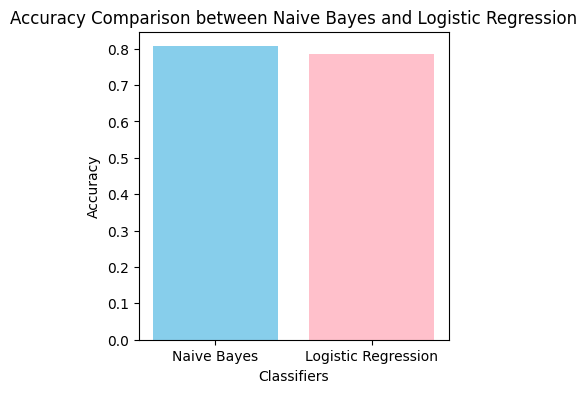

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.bar(['Naive Bayes', 'Logistic Regression'], [accuracy_naive_bayes, accuracy_logistic], color=['skyblue', 'pink'] , width = 0.8)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Naive Bayes and Logistic Regression')
plt.show()